# <font color='red'>Backpropagation</font>


In this assignment, you will implement Backpropagation from scratch. You will then verify the correctness of the your implementation using a "grader" function/cell (provided by us) which will match your implmentation.

The grader fucntion would help you validate the correctness of your code.

Please submit the final Colab notebook in the classroom ONLY after you have verified your code using the grader function/cell.




## <font color='red'>Loading data </font>

In [ ]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files=files.upload()

Saving data.pkl to data.pkl


In [ ]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


<font color='blue'><b>Check this video for better understanding of the computational graphs and back propagation</font>

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('i94OvYb6noo',width="1000",height="500")

# <font color='red'>Computational graph</font>


*  **If you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]**.<br><br>
*  **The final output of this graph is a value L which is computed as (Y-Y')^2**

## <font color='red'>Task 1: Implementing Forward propagation, Backpropagation and Gradient checking </font>

# <font color='red'>Task 1.1 </font>

## <font color='blue'>Forward propagation </font>


*  <b>
    Forward propagation</b>(Write your code in<font color='blue'> def forward_propagation()</b></font>)<br><br>
    For easy debugging, we will break the computational graph into 3 parts.

    <font color='green'><b>Part 1</b></font></b>
    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <font color='green'><b>Part 2</b></font></b><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <font color='green'><b>Part 3</b></font></b>
    <img src='https://i.imgur.com/vMyCsd9.png'>

In [ ]:
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    # we can use this function in forward and backward propagation
    # write the code to compute the sigmoid value of z and return that value
    sigm=1/(1+math.exp(-z))
    return sigm

In [ ]:
def grader_sigmoid(z):
  #if you have written the code correctly then the grader function will output true
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

In [ ]:
def forward_propagation(x, y, w):
  forward_dict={}
  val_1= (w[0]*x[0]+w[1]*x[1]) * (w[0]*x[0]+w[1]*x[1]) + w[5]
  part_1=np.exp(val_1)
  val_2= part_1+w[6]
  part_2=np.tanh(val_2)
  val_3= (((np.sin(w[2]*x[2]))*((w[3]*x[3])+(w[4]*x[4])))+w[7])
  part_3=sigmoid(val_3)
  y_pred= (part_3*w[8])+part_2
  loss_l=(y-y_pred)**2
  dy_loss=-2*(y-y_pred)

  forward_dict["exp"]=part_1
  forward_dict["tanh"]=part_2
  forward_dict["sigmoid"]=part_3
  forward_dict["loss"]=loss_l
  forward_dict["dy_pred"]=dy_loss
  forward_dict["y_hat"]=y_pred

  return forward_dict



In [ ]:
def grader_forwardprop(data):
    dl = (data['dy_pred']==-1.9285278284819143)
    loss=(data['loss']==0.9298048963072919)
    part1=(data['exp']==1.1272967040973583)
    part2=(data['tanh']==0.8417934192562146)
    part3=(data['sigmoid']==0.5279179387419721)
    assert(dl and loss and part1 and part2 and part3)
    return True
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
grader_forwardprop(d1)

True

# <font color='red'>Task 1.2 </font>

## <font color='blue'>Backward propagation</font>

<img src='https://i.imgur.com/seSGbNS.png'>

In [ ]:
def backward_propagation(x,y,w,forward_dict):
    '''In this function, we will compute the backward propagation '''

    backward_dict={}
    #store the variables dw1,dw2 etc. in a dict as backward_dict['dw1']= dw1,backward_dict['dw2']= dw2...
    dw9= forward_dict["dy_pred"]*forward_dict["sigmoid"]
    dw8= forward_dict["dy_pred"]*(forward_dict["sigmoid"]*(1-forward_dict["sigmoid"]))*w[8]
    dw7= forward_dict["dy_pred"]*(1-(forward_dict["tanh"])**2)
    dw6= forward_dict["dy_pred"]*(1-(forward_dict["tanh"])**2)*forward_dict["exp"]
    dw5= forward_dict["dy_pred"]*forward_dict["sigmoid"]*(1-forward_dict["sigmoid"])*w[8]*np.sin(w[2]*x[2])*x[4]
    dw4= forward_dict["dy_pred"]*forward_dict["sigmoid"]*(1-forward_dict["sigmoid"])*w[8]*np.sin(w[2]*x[2])*x[3]
    dw3=forward_dict['dy_pred']*(forward_dict['sigmoid']*(1-forward_dict['sigmoid']))*w[8]*np.cos(x[2]*w[2])*x[2]*((w[3]*x[3])+(w[4]*x[4]))
    dw2=forward_dict["dy_pred"]*(1-(forward_dict["tanh"])**2)*forward_dict["exp"]*2*((w[0]*x[0])+(w[1]*x[1]))*x[1]
    dw1=forward_dict["dy_pred"]*(1-(forward_dict["tanh"])**2)*forward_dict["exp"]*2*((w[0]*x[0])+(w[1]*x[1]))*x[0]


    backward_dict['dw1']=dw1
    backward_dict['dw2']=dw2
    backward_dict['dw3']=dw3
    backward_dict['dw4']=dw4
    backward_dict['dw5']=dw5
    backward_dict['dw6']=dw6
    backward_dict['dw7']=dw7
    backward_dict['dw8']=dw8
    backward_dict['dw9']=dw9

    return backward_dict

In [ ]:
def grader_backprop(data):
    dw1=(np.round(data['dw1'],6)==-0.229733)
    dw2=(np.round(data['dw2'],6)==-0.021408)
    dw3=(np.round(data['dw3'],6)==-0.005625)
    dw4=(np.round(data['dw4'],6)==-0.004658)
    dw5=(np.round(data['dw5'],6)==-0.001008)
    dw6=(np.round(data['dw6'],6)==-0.633475)
    dw7=(np.round(data['dw7'],6)==-0.561942)
    dw8=(np.round(data['dw8'],6)==-0.048063)
    dw9=(np.round(data['dw9'],6)==-1.018104)
    # assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    assert(dw9 and dw8 and dw7 and dw6 and dw5 and dw4 and dw2 and dw1 and dw3)
    return True
w=np.ones(9)*0.1
forward_dict=forward_propagation(X[0],y[0],w)
backward_dict=backward_propagation(X[0],y[0],w,forward_dict)
grader_backprop(backward_dict)

True

# <font color='red'>Task 1.3 </font>

 ## <font color='blue'>Gradient clipping</font>

<b> Check this  <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> for more details on Gradient clipping

 we know that the derivative of any function is

 $$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$


*  The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared.

*  In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of <b>gradient checking!</b>

## <Font color='blue'>Gradient checking example</font>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$

from the above function , lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> =
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}


## <font color='red'> Implement Gradient checking </font> <br>
 (Write your code in <font color='blue'> def gradient_checking()</font>)

**Algorithm**



In [ ]:
random.seed(5)
def gradient_checking(x,y,w,eps):

  # w=np.random.normal(0.0,1.0,9)
  forward_d=forward_propagation(x,y,w)
  backward_d=backward_propagation(x,y,w,forward_d)
  backward_list=list(backward_d.values())
  approx_gradients=[]
  a1=[]
  difference_list=[]

  for i in range (len(w)):
    # print(w)
    # print(i)
    w[i]=w[i]+eps
    # print(i)
    # print(w)
    dict_1=forward_propagation(x,y,w)
    value_1=dict_1["loss"]
    # i=i-eps
    w[i]=w[i]-eps-eps
    # print (w)
    dict_2=forward_propagation(x,y,w)
    value_2=dict_2["loss"]
    dw_approx=(value_1-value_2)/(2*eps)
    approx_gradients.append(dw_approx)
  for i in range (len(approx_gradients)):
    difference=(backward_list[i]-approx_gradients[i])/(backward_list[i]+approx_gradients[i])
    difference_list.append(difference)
  difference_list=np.array(difference_list)
  return difference_list


In [ ]:
def grader_grad_check(value):
    print(value)
    assert(np.all(value <= 10**-3))
    return True

w=[ 0.00271756,  0.01260512,  0.00167639, -0.00207756,  0.00720768,
   0.00114524,  0.00684168,  0.02242521,  0.01296444]

eps=10**-7
value= gradient_checking(X[0],y[0],w,eps)
grader_grad_check(value)

[-1.73921918e-08  1.28741906e-05 -2.55164399e-04 -1.05871856e-05
 -1.95446016e-04 -1.16536595e-10 -9.63625495e-08 -1.06774471e-07
 -1.43339489e-08]


True

# <font color='red'> Task 2 : Optimizers </font>

* As a part of this task, you will be implementing 2  optimizers(methods to update weight)
* Use the same computational graph that was mentioned above to do this task
* The weights have been initialized from normal distribution with mean=0 and std=0.01. The initialization of weights is very important otherwiswe you can face vanishing gradient and exploding gradients problem.

**Check below video for reference purpose**

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('gYpoJMlgyXA',width="1000",height="500")

<font color='blue'><b>Algorithm</b>

<pre>
    for each epoch(1-20):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  
</pre>

## <font color='red'> Implement below tasks</b>


*  <b>Task 2.1</b>: you will be implementing the above algorithm with <b>Vanilla update</b> of weights<br><br>
*  <b>Task 2.2</b>: you will be implementing the above algorithm with <b>Momentum update</b> of weights<br><br>
*  <b>Task 2.3</b>: you will be implementing the above algorithm with <b>Adam update</b> of weights<br><br>


**Note : If you get any assertion error while running grader functions, please print the variables in grader functions and check which variable is returning False .Recheck your logic for that variable .**

### <font color='blue'>2.1 Algorithm with Vanilla update of weights</font>

In [ ]:
wts=np.random.normal(0,0.01,9)
loss_list=[]
for i in range (20):
  y_hat_list=[]
  for j in range(len(X)):
    for_dict=forward_propagation(X[j], y[j], wts)
    # print(for_dict)
    back_dict=backward_propagation(X[j],y[j],wts,for_dict)
    back_dict_list=list(back_dict.values())
    # print(back_dict)
    y_hat=for_dict["y_hat"]
    y_hat_list.append(y_hat)
    learning_rate=0.05
    for k in range(len(wts)):
      wts[k]=wts[k]-(learning_rate*back_dict_list[k])
  sum=0
  for i in range (len(y)):
    loss_1=(y[i]-y_hat_list[i])**2
    sum+=loss_1
  loss_list.append(sum/len(y))
print (loss_list)

[0.04227570107148861, 0.02060602950198352, 0.020541172934162917, 0.017714315165150922, 0.0057863443361068955, 0.0015951587578812354, 0.0010089215969745651, 0.0008231411061129159, 0.0007344961066662013, 0.0006780657930011032, 0.0006325020386352777, 0.0005907769958832863, 0.0005509251974380329, 0.0005126124605673272, 0.0004759364847222971, 0.00044104951432267445, 0.00040806037444312925, 0.00037702214218258897, 0.0003479414601697298, 0.00032079044358323844]


Text(0.5, 1.0, 'epochs v/s loss with simple SGD')

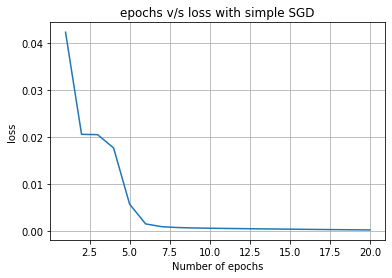

In [ ]:
x=[i for i in range(1,21)]
plt.plot(x,loss_list,label="loss")
plt.grid()
plt.xlabel("Number of epochs")
plt.ylabel("loss")
plt.title("epochs v/s loss with simple SGD")

### <font color='blue'>2.2 Algorithm with Momentum update of weights</font>

<img src='https://i.imgur.com/gyPSXhS.png'>

Here Gamma referes to the momentum coefficient, eta is leaning rate and v_t is moving average of our gradients at timestep t

In [ ]:
v=np.zeros(9)
wts = np.random.normal(0,0.01,9)
loss_list_mome=[]
for i in range (20):
  y_hat_list_mome=[]
  for j in range(len(X)):
    for_dict_mome=forward_propagation(X[j], y[j], wts)
    # print (for_dict_mome)
    back_dict_mome=backward_propagation(X[j],y[j],wts,for_dict_mome)
    back_dict_mome_list=list(back_dict_mome.values())
    # print (back_dict_mome)
    y_hat_mome=for_dict_mome["y_hat"]
    y_hat_list_mome.append(y_hat_mome)
    learning_rate=0.05
    gamma=0.9  # typically gamma=0.9
    for k in range(len(wts)):
      v[k]=(gamma*v[k])+(learning_rate*back_dict_mome_list[k])
      wts[k]=wts[k]-v[k]  #reference from https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d
  sum_mome=0
  for i in range (len(y)):
    loss_1_mome=(y[i]-y_hat_list_mome[i])**2
    sum_mome+=loss_1_mome
  loss_list_mome.append(sum_mome/len(y))
print (loss_list_mome)



[0.042979193894686976, 0.003918293316608742, 0.003426849077410282, 0.00307738436648335, 0.0028304001438585447, 0.002599629827843589, 0.002318773487632943, 0.0019814439118842294, 0.001607095179458858, 0.0012275751621556325, 0.0008806564011506551, 0.0005975221556789231, 0.0003896710343054289, 0.00024872859570513364, 0.0001575170226893656, 9.972639594980304e-05, 6.33411147707882e-05, 4.041287002969125e-05, 2.5909266693283917e-05, 1.669141466481329e-05]


Text(0.5, 1.0, 'epochs v/s loss with momentum SGD')

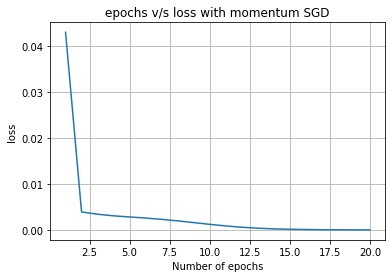

In [ ]:
x_mome=[i for i in range(1,21)]
plt.plot(x_mome,loss_list_mome,label="loss")
plt.grid()
plt.xlabel("Number of epochs")
plt.ylabel("loss")
plt.title("epochs v/s loss with momentum SGD")

### <font color='blue'>2.3 Algorithm with Adam update of weights</font>

<img src='https://i.imgur.com/GDR8UFP.jpg'>

In [ ]:
m=np.zeros(9)
v=np.zeros(9)
wts = np.random.normal(0,0.01,9)
loss_list_adam=[]
for i in range (20):
  y_hat_list_adam=[]
  for j in range(len(X)):
    for_dict_adam=forward_propagation(X[j], y[j], wts)
    #print (for_dict_adam)
    back_dict_adam=backward_propagation(X[j],y[j],wts,for_dict_adam)
    back_dict_adam_list=list(back_dict_adam.values())
    # print (back_dict_adam)
    y_hat_adam=for_dict_adam["y_hat"]
    y_hat_list_adam.append(y_hat_adam)
    learning_rate=0.05
    beta_1=0.9
    beta_2=0.99
    epslon=0.0001
    for k in range (len(wts)):
      m[k]=((m[k]*beta_1)+((1-beta_1)*back_dict_adam_list[k]))
      v[k]=((v[k]*beta_2)+((1-beta_2)*(back_dict_adam_list[k])**2))
      m_hat=m[k]/(1-beta_1)
      v_hat=v[k]/(1-beta_2)
      wts[k]=wts[k]-((0.001*m_hat)/(np.sqrt(v_hat+epslon)))
  sum_adam=0
  for i in range (len(y)):
    loss_1_adam=(y[i]-y_hat_list_adam[i])**2
    # print (loss_1_adam)
    sum_adam+=loss_1_adam
  loss_list_adam.append(sum_adam/len(y))
print (loss_list_adam)



[0.46628596096598957, 0.07754028582675118, 0.0052281664485974745, 0.00150387922009514, 0.000557537541657814, 0.00023804996216298053, 0.00010708722788708332, 5.419803107982408e-05, 2.8056179230273716e-05, 1.4240091941133976e-05, 7.295304836392695e-06, 4.386496100281584e-06, 3.2440883523816507e-06, 2.6656782253177935e-06, 2.3195740591701247e-06, 2.096346518596016e-06, 1.9384403562769533e-06, 1.8155165465373385e-06, 1.7129537497340157e-06, 1.6237688649191662e-06]


Text(0.5, 1.0, 'epochs v/s loss with Adam')

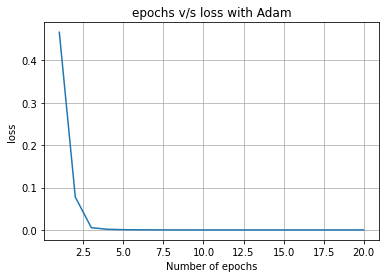

In [ ]:
x_adam=[i for i in range(1,21)]
plt.plot(x_adam,loss_list_adam,label="loss")
plt.grid()
plt.xlabel("Number of epochs")
plt.ylabel("loss")
plt.title("epochs v/s loss with Adam")

<font color='blue'>Comparision plot between epochs and loss with different optimizers. Make sure that loss is conerging with increaing epochs</font>

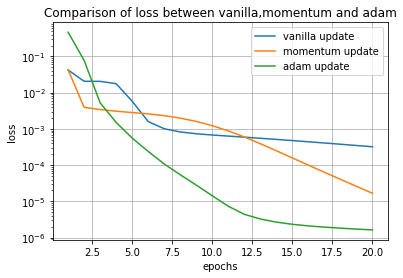

In [ ]:
#plot the graph between loss vs epochs for all 3 optimizers.
plt.plot(x,loss_list,label="vanilla update")
plt.plot(x_mome,loss_list_mome,label="momentum update")
plt.plot(x_adam,loss_list_adam,label="adam update")
plt.title('Comparison of loss between vanilla,momentum and adam')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.yscale('log')
plt.grid()
plt.legend()
plt.show()



We can conclude that evn after having more loss at start, adam update converged faster as compared to vanilla and momentum.
And momentum update works better than vanilla as we are updating weights using momentum.